<a href="https://colab.research.google.com/github/ArunanandMurmu/angular.js/blob/master/Notes_6_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content

- Recap of Kmeans

- Problems with Kmeans

- Hard Clustering

- 1-D Gaussian

- 2-D Gaussian

- Gaussian Mixture Model

- Expectation Maximization Algo

- Code walkthough: Amazon customer segmentation

- Comparison between Kmeans and GMM

## Recap of Kmeans

We learnt that there are 2 steps involved in Kmeans algo:

#### 1. Initialization



**What did we do in this step?**

In this step, we initialized k random points

\

**What is k here?**

> k is the number of cluster we want.

#### 2. Iterate till convergence

We do the following in this step:

a. Assign all the points to their nearby cluster centroid.


b. Recompute the centroid.

All easy! But we faced some problems with Kmeans

## Problems with Kmeans clustering

### Can you recall the issues with Kmeans ?

#### Globular clusters

The main issue with Kmeans clustering was
- it creates **globular clusters**

i.e. spherical/ circular clusters

Suppose we have the following dataset:


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/909/original/gmm1.png?1712066826' width = "800"></center>





#### How many clusters do you see here ?

We can see there are 2 clusters over here

#### What do desired clusters look like?


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/914/original/gmm4.png?1712070223' width = "800"></center>







If we try clustering it using Kmeans, we get the following result:


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/911/original/gmm3.gif?1712067640' width = "800"></center>







#### Did you notice the shape of cluster ?

Notice that shape of cluster we are getting are circular/spherical


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/582/original/gmm46.png?1712557333' width = "800"></center>









There is one more problem with Kmeans

#### Different Size clusters

Kmeans doesnt work well in clusters with different size

Say, we have the following clusters:


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/918/original/gmm6.png?1712071055' width = "800"></center>











We want the desired clusters to be:


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/920/original/gmm7.png?1712071171' width = "800"></center>













However, Kmeans will give us the following clusters

i.e. it again tried to make spherical structures


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/921/original/gmm8.gif?1712071222' width = "800"></center>







<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/583/original/gmm47.png?1712557348' width = "800"></center>








But the problem we want to focus on is:

## Hard Clustering

**What is hard clustering?**

Recall that in kmeans
- we tried to assign datapoint to a single cluster
- we never said that a datapoint can belong to cluster A or cluster B

This concept is called **hard clustering**
- i.e. where each datapoint is associated with only single cluster. (not multiple cluster)

#### But, it doesn't looks like problem if a datapoints belong to only one cluster. Do you see any problem with it ?

Let's try to understand the problem with our previous use case i.e. Amazon Customer segmentaion

Say, we have 3 types of customer and
- each type has been segregated into their respective cluster


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/929/original/gmm10.png?1712080909' width = "800"></center>










Say we got a query point, $x_q$

#### How will Kmeans clustet query point ?


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/933/original/gmm11.png?1712081452' width = "800"></center>












It'll look for nearest centroid.


As centroid belonging to high spender is closest, it'll be labeled as high spender datapoint.

#### But, is this a good approach ?


**Is this a good approach to simply assign it to single cluster?**


It is possible that not all customers will solely belong to a single cluster.



For example,

- A customer can be both wealthy and still be price-conscious.
- Let's say, he/she can fall in the "high spender" cluster with a probability of 60%,
- but in the "price-concsious" cluster with a probability of 40%.

i.e. There is a probability attached to datapoint belonging to a cluster.

This concept of assigning datapoint to multiple cluster is called **soft clustering**

#### But, Kmeans doesnt support the idea of soft clustering. How do we do it then ?



This is where GMMs comes to the resue!

Let's dive into how GMMs work


But before let's take a quick detour and quicky revise the gaussian distribution

## 1 D Gaussain

Say, we have the data of height of people across the country.

#### How will the plot of data look like ?

There will be more people with average height
- as we move away from average height, the count of people will decrease.

\

So, when we plot the frequency of occurence of data, we get :


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/936/original/gmm12.png?1712083451' width = "800"></center>














Recall that
- this curve is called normal / gaussian distribtion
- In Normal distribution, mean = median = mode.
- Curve is symmetric around the mean

#### How do we calculate likelihood of datapoint?

Say, we are given a datapoint x,

**How will we calculate the liklihood of point belonging to the distribution ?**

The liklihood of datapoint `x` is given as the
- y value corresponding that x  i.e. y component of that instance.


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/971/original/gmm13.png?1712135827' width = "800"></center>




Mathematically, we calculate the liklihood as:


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/972/original/gmm14.png?1712135971' width = "800"></center>






### Properties of Guassian distribution

#### What will happen if we change the mean of the distribution?

If we were to change the mean of the distribution,
- the position of the distribution will change.

However, the shape of the distribution doesn't change


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/992/original/gmm15.png?1712139575' width = "800"></center>








#### How will changing the std dev impact the distribution ?

When we change the std dev/ variance
- the shape of the distribution changes




<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/994/original/gmm16.png?1712140171' width = "800"></center>










As we increase the std dev,
- the peak will flatten out and the tails will be fatter

and when we decrease it,
- it'll get more peaked and thin tails.

#### Summarize

- Mean (μ) tells us the position of the gaussian distribution

- where as, std dev (σ) tells us the shape.

\


Using these params of gaussian distribution,
- we can define and **control** the distribution

Now that we have understood 1D gaussian, let's try to up the ante and jump into 2D gaussian

## 2D Gaussian

In 1D gaussian, we had only 1 variable
- for example: Distribution of heights across the country


Similarly, in 2D gaussian, we will have 2 variable.


#### Visualizing 2D gaussian

Let's try to visualize it

link: https://socr.umich.edu/HTML5/BivariateNormal/


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/999/original/gmm17.png?1712141280' width = "600"></center>












If we project a light from direction of X,
- we'll see projection of guassian coming up on the plane

Similarly, if we get a project from the direction of Y,
- we'll again get a 1D gaussion projected.

The combination of these gaussian distribution is giving us a 2D gaussian distribution.


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/010/original/gmm18.png?1712147889' width = "800"></center>






#### What will the plot looks from top view ?

**Say, we cut the plot using 3 different plane, how will the plot look like from the top ?**


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/021/original/gmm19.png?1712150500' width = "800"></center>








It'll give us a plot of concentric circles

- This plot of concentric circle is nothing but contour plot.


#### Which concentric circle will have higher likelihood ?

As the distribution is spreading towards outwards,
- datapoints on inner ring will have higher likelihood as compared to datapoints belonging to outer ring.


However, all the datapoints on a ring will have same likelihood

**Why?**

Coz the ring is at the same height i.e. z axis when we consider the 2D gaussian plot
- and we get the likelihood values from the z axis in 2D gaussian plot.



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/029/original/gmm21.png?1712152797' width = "800"></center>







### How to find likelihood value mathematically?

mathematically, the likelihood value is given as :


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/030/original/gmm22.png?1712153297' width = "800"></center>









#### Que: What will be the shape of x vector?

Since we have 2 variables i.e. 2 dimensions
- X vector will also have two components $x^1, x^2$ and be of the shape 2x1

### Impact of change in mean and std dev

vizualization: https://www.wolframcloud.com/objects/demonstrations/TheBivariateNormalDistribution-source.nb

#### How will changing the mean impact 2D gaussian ?

As we know
- mean is responsible for the position of the distribution

If we were change the mean,
- it'll shift the distribution.


However, as there are 2 means involved ($\mu_x, \mu_y$),
- Changing $\mu_x$ will shift distributin along x axis
- Changing $\mu_y$ will translate the distribution along y axis.


Using these two,
- we can put our distribution at any place we want.


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/033/original/gmm23.gif?1712154555' width = "800"></center>











#### Impact of varying the std dev.

Increaseing/ decreasing the value of $σ_x, σ_y$ will
- flatten out the circle giving us the elliptical shape


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/035/original/gmm24.gif?1712154906' width = "800"></center>













Using the mean and variance, we were able to
- change the position as well as the shape of the distribution.

However, the change in shape of distribution is limited to elliptical



But, there is a chance that data has a shape of angled ellipse.

**How do we handle cases like that?**

This is where covariance helps us

#### Impact of covariance

By varing the the ρ (covariance)
- we can control the angle of the distribution.


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/061/original/gmm25.gif?1712171077' width = "800"></center>















All this knowledge of gaussian distribution is fine, **But how do we use this for clustering of our data ?**

**What has guassian supposed to do with clustering?**

\


Let's try to understand how we can make models using gaussian distribution and use them for clustering

## Gaussian Mixture Model intuition

Say, you are working as a analyst with the team of researchers at a university dermatology department

\

They are conducting a clinical trial to evaluate the effectiveness of a new topical treatment for hair loss


This trail involes recording the hair length of various participants.

\

After collecting the data, you decided to plot its distribution

#### Que:  How will the distribution look like ?

The values will concentrate in two different regions


**Why?**

This is coz
- hair length for men will be short in length
- compared to hair length for women

The distribution will look as follows :


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/068/original/gmm26.png?1712178078' width = "800"></center>









### Que:  Can we model this data using a single gaussian distribution ?

Say, we try to model it as follows:




<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/069/original/gmm27.png?1712178576' width = "800"></center>











**Is it a good fit?**

No right?

We are not able to model the data using a single gaussian distribution

#### What if we use 2 gaussian distribution ?


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/075/original/gmm28.png?1712203987' width = "800"></center>













We can use two 1 - D gaussian distribution
- with different μ (mean) and σ (std dev)
- to model our data

### What are we trying to achieve?

The **idea** behind GMM is:

We try to fit gaussian distribution to each of the data cluster and check  
- if datapoint belongs to the gaussian distribution
- it means it belong to the cluster as well.

i.e. **More the likelihood of datapoint belonging to the distribution, more we can say that datapoint belongs to the cluster.**




This is nothing but Gaussian Mixture Model

**Why Mixture model?**

> We are trying to use more than 1 gaussian to model our data.

**To summarize:**

 A dataset can have multiple cluster and we can choose multiple gaussian to model that data.


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/077/original/gmm29.png?1712204763' width = "800"></center>















Let's go back to the dataset where Kmeans was failing and see if GMM helps us over there


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/078/original/gmm30.png?1712205156' width = "800"></center>





We were getting the following results from Kmeans:


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/079/original/gmm2.png?1712205196' width = "800"></center>





Based on what we have learnt so far

### Do you think GMM will be able to solve the issues of Kmeans ?

If we use two gaussians here,
- we change the means μ to change their position
- and vary the σ to change the shape.

So, i can make them any shape at any location in this 2D Plane
- and them for clustering


The expected results of GMM will be:


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/086/original/gmm31.png?1712208920' width = "800"></center>







Now, we can use the GMM to cluster the data which Kmeans was having difficulty with.

### Que: Do we have decide on the number of gaussian before we begin clustering ?  

Yes!

Just like Kmeans,
- we have to select the number of cluster we want
- and based on that we decide the number of gaussian we will be employing.

**How do we choose the k (# of cluster) ?**

> Based on the domain knowledge

Now that we are clear with the intution of GMM,

**How do we fit these gaussian distributions to the data?**

> We use Expectation Maximization Algo for that.

Let's understand the internals of it

## Expectation Maximization (EM) Algo

Just like kmeans, first step here is:

### 1. Initalization

#### What do we do in initialization?

In Kmeans,
- we used to initialize k cluster centroids.


So, initially, we need to decide the number of clusters we need i.e. $k$
- based on domain knowledge

However, GMM revolves around fitting gaussian distribution on that data
- so, we need to initialize params of distribution




#### What params do we need to initialize for Gaussian distribution?

We need to initalize
- means (μ)
- std dev/ variance (σ)

#### Initializing the mean

Given the dataset D,

- we choose k random datapoints as mean


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/117/original/gmm32.png?1712220313' width = "800"></center>









For simplicity, let's assume that we have 1 -D data
- with k = 2

#### Initializing the variance

The variance for each distribution is initialized as :


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/136/original/gmm34.png?1712225652' width = "800"></center>







### 2. Expectation step

In this step,

- we calculate the likelihood of all datapoints belonging for each distribution.

For hair length data, assume our initialized distribution look as follows:


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/138/original/gmm35.png?1712226271' width = "800"></center>









Now, for each point we calculate the likelihood of it belonging to both the distribution


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/139/original/gmm36.png?1712226537' width = "800"></center>











#### But, the likelihood values for a datapoint are not adding up to 1. Why?

Let's try to understand it using a simple example:

If we were to ask,

**What is the probability of you a person being in delhi right now?**

We can say that
- as the population of delhi is close to 3 crore
- assuming the total population to be approx 100 crore

We can say probability of person being in delhi is 0.03

Now, consider a case where we have to find probability of:

**Probability of an indian who's in new york ?**

This probability will be lesser than that of delhi
- assume it to be around 0.003

Notice that

- What we have calculated till now are probabilities of two indepedent event.
- there is no dependency or relation between two.

However, let's add a condition to it.

Condition: we know that person can either be in delhi or new york

**What will be the probability that they are in Delhi?**

This probability will be calculated as:

$$\frac{0.03}{0.03 + 0.003} = 0.90$$

Similarly,

- till now, we were calculating the likelihood of datapoint belonging to the distribution independently.

However, we know that
- the datapoint will be belonging to either of the distribution

**So, we need to normalize the likelihood values**

#### How we will normalize it?

If there are two clusters, then;

$$P_{1} = \frac{P_{1}}{P_{1} + P_{2}}, and \ P_{2} = \frac{P_{2}}{P_{1} + P_{2}}$$

Let's recompute the likelihoods


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/152/original/gmm37.png?1712231568' width = "800"></center>













The normalized likelihoods come out to be:


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/153/original/gmm38.png?1712231595' width = "800"></center>















After computing the likelihoods, we move on to next step

### 3. Maximization step

In this step,
- we update the mean and variance of the distributions

#### How to update mean values?

We update the means by taking the weighted average of the datapoint using the likelihoods value computed in last step

Let's see how we do that

Say, the datapoint values are as follows:
$$x_1 = 10, x_2 = 20, x_3 = 30$$

The mean are updated as follows:


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/162/original/gmm39.png?1712233405' width = "800"></center>




<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/163/original/gmm40.png?1712233735' width = "800"></center>





#### How to update variance?


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/207/original/gmm41.png?1712242609' width = "800"></center>







We keep on repeating
-  step 2 (Expectation) and step 3 (Maximization)
    - i.e. calculating likelihoods of datapoints
    - and then updating the mean and variance
    
until convergence




### Visualizing the process

link :https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif


<center><img src='https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif' width = "600"></center>















link: https://raw.githubusercontent.com/RobRomijnders/EM/master/im/EM_cherry5.gif


<center><img src='https://raw.githubusercontent.com/RobRomijnders/EM/master/im/EM_cherry5.gif' width = "600"></center>

















## Code walkthrough

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12)

### Loading data

In [ ]:
 !wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2024-06-03 07:29:53--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 142.251.111.138, 142.251.111.113, 142.251.111.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.111.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download [following]
--2024-06-03 07:29:53--  https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.122.132, 2607:f8b0:4004:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.122.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139827 (137K) [application/octet-stream]
Saving to: ‘E-commerce.csv’

E-commerce.csv      100%[===================>] 136.55K  --.

In [ ]:
df = pd.read_csv('./E-commerce.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


In [ ]:
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [ ]:
df.drop('ID',axis=1,inplace=True)

### Standardizing

Standardizing only the numerical features

In [ ]:
std_scaler = StandardScaler().fit(df)
std_df = std_scaler.transform(df)

In [ ]:
std_df = pd.DataFrame(std_df,columns=df.columns)

std_df.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,-1.495250,-0.758535,-1.054611,-0.732800,0.323118,0.339192
1,0.720691,-1.247488,-0.690292,-0.786002,0.272672,-0.310034
2,0.597285,0.193635,-0.246428,0.935872,0.464365,2.077120
3,1.573801,-0.295317,-0.213449,0.947616,-0.534456,-0.010392
4,-1.006992,-0.269583,-1.083008,-0.665697,0.424009,0.578906


### PCA-Visualizing the data in 2D

Converting our data using PCA for visualizing in 2D
#### Let's plot two features data now:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)

components = pca.fit_transform(std_df)

x_1 = components[:,0]
x_2 = components[:,1]

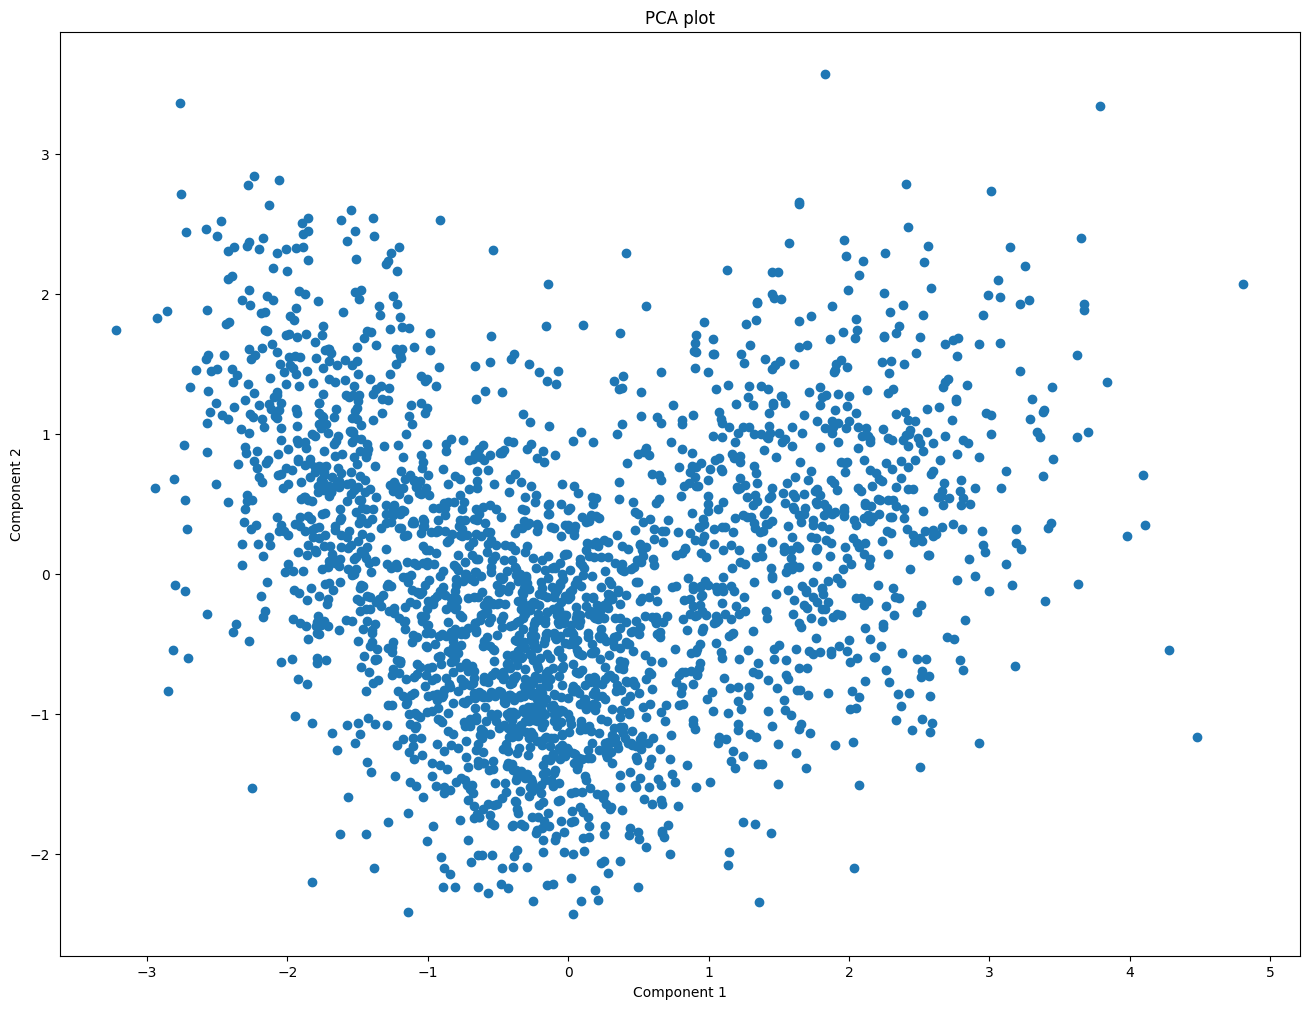

In [ ]:
plt.scatter(x_1,x_2)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA plot")
plt.show()

### Clustering using GMM

documentation: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

#### With k = 3 (clusters = 3 )

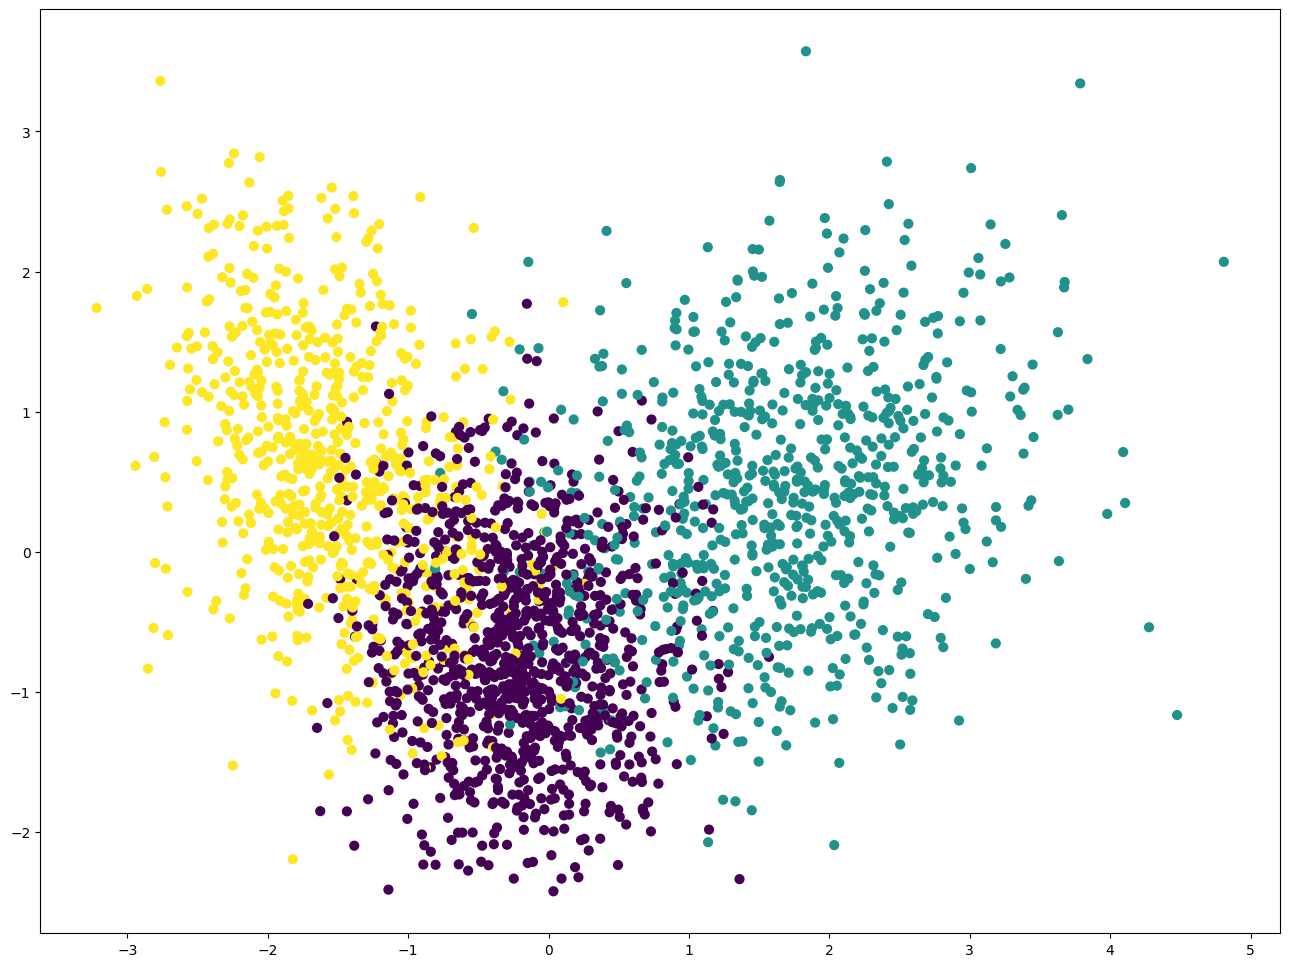

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(std_df)
labels = gmm.predict(std_df)
plt.scatter(x_1, x_2, c=labels, s=40, cmap='viridis');

#### TSNE viz

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE()

In [ ]:
transformed_df = tsne.fit_transform(std_df)

In [ ]:
tsne_x_1 = transformed_df[:,0]
tsne_x_2 = transformed_df[:,1]

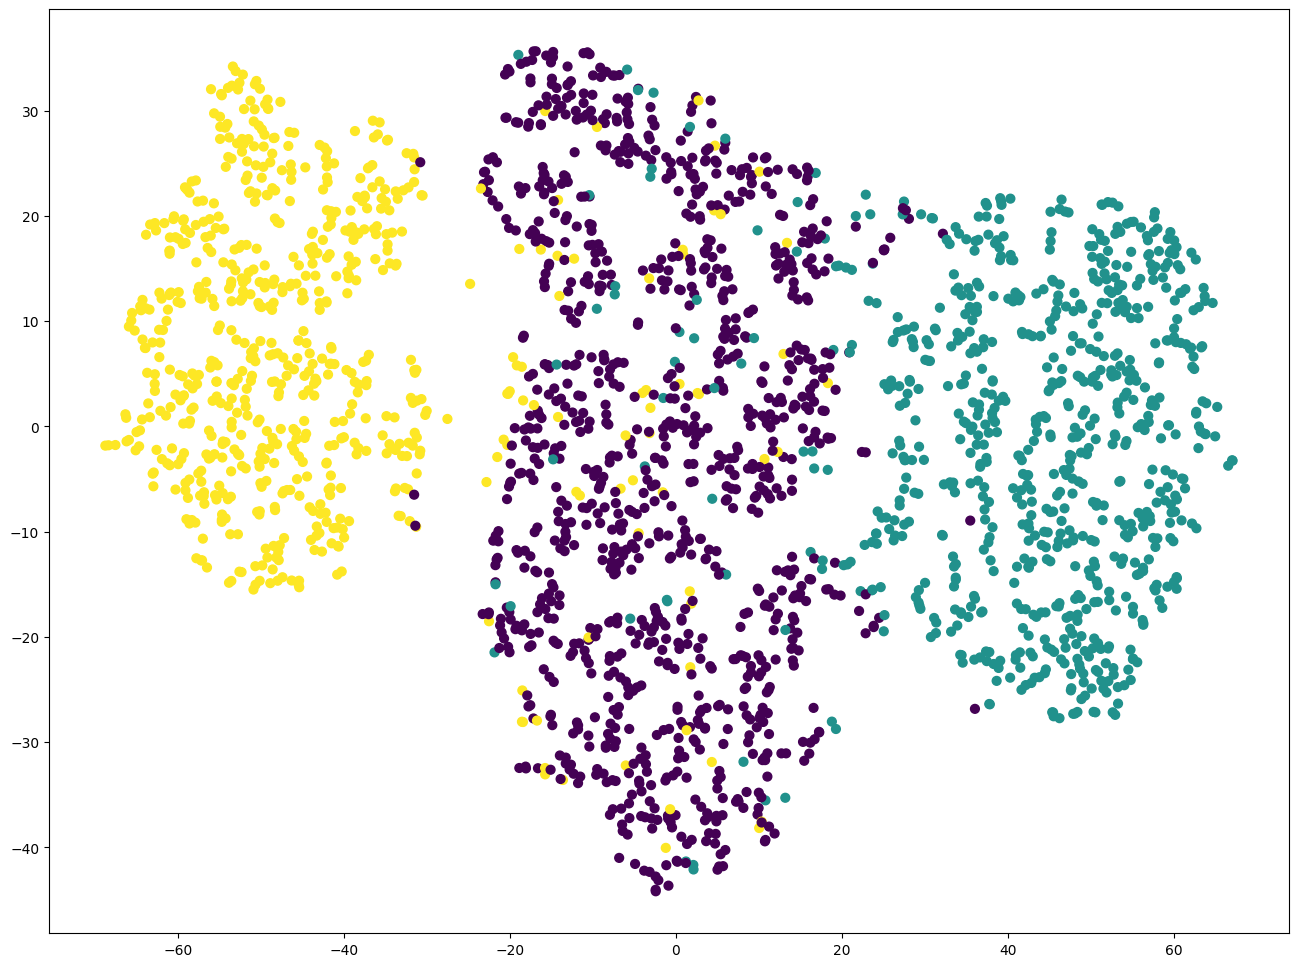

In [ ]:
plt.scatter(tsne_x_1, tsne_x_2, c=labels, s=40, cmap='viridis');

### Comparing with Kmeans

In [ ]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(std_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


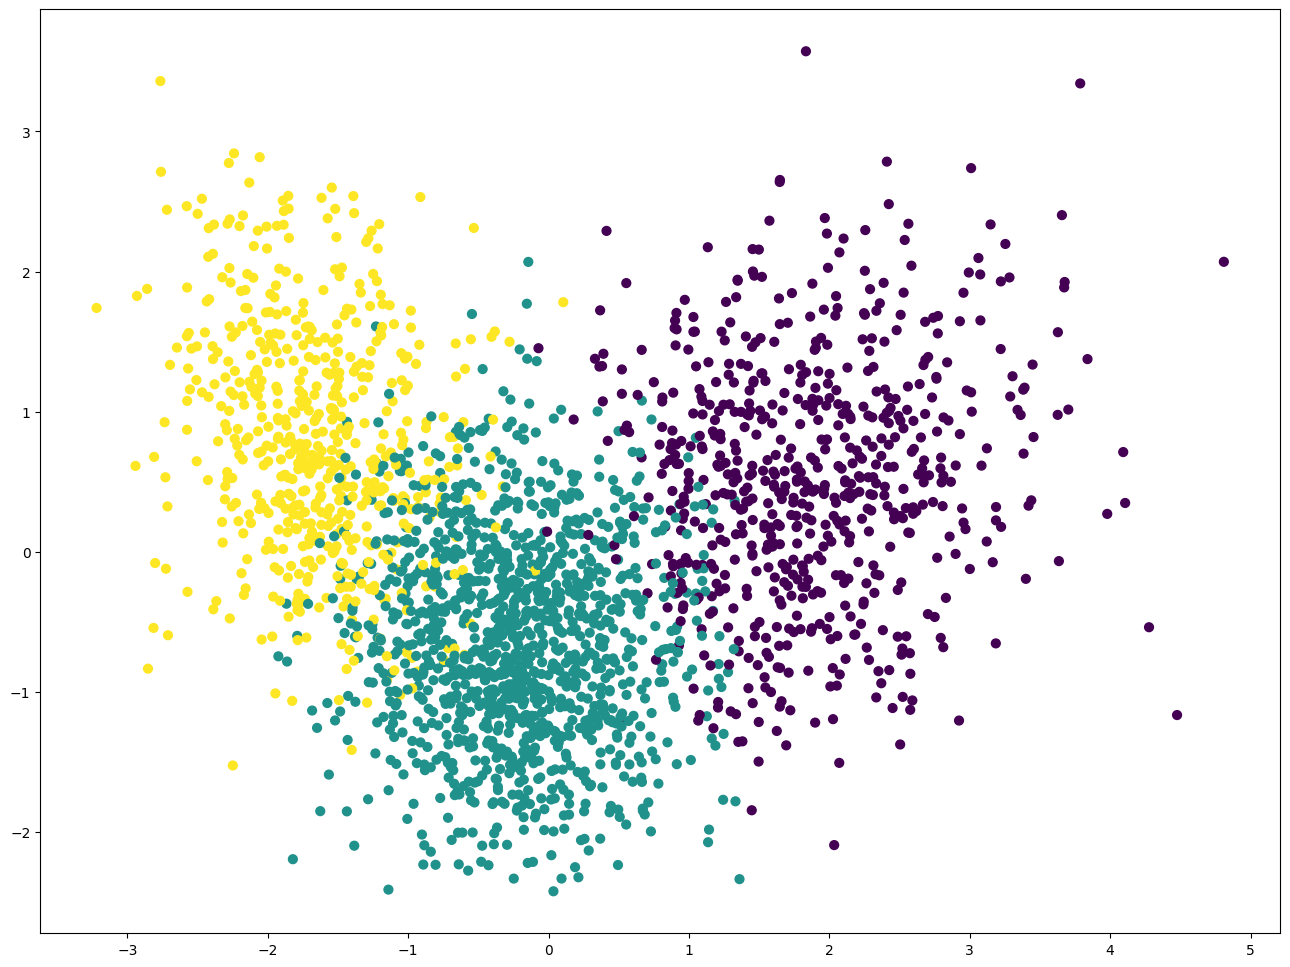

In [ ]:
plt.scatter(x_1, x_2, c=kmeans.labels_, s=40, cmap='viridis');

#### TSNE viz

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE()

In [ ]:
transformed_df = tsne.fit_transform(std_df)

In [ ]:
x_1 = transformed_df[:,0]
x_2 = transformed_df[:,1]

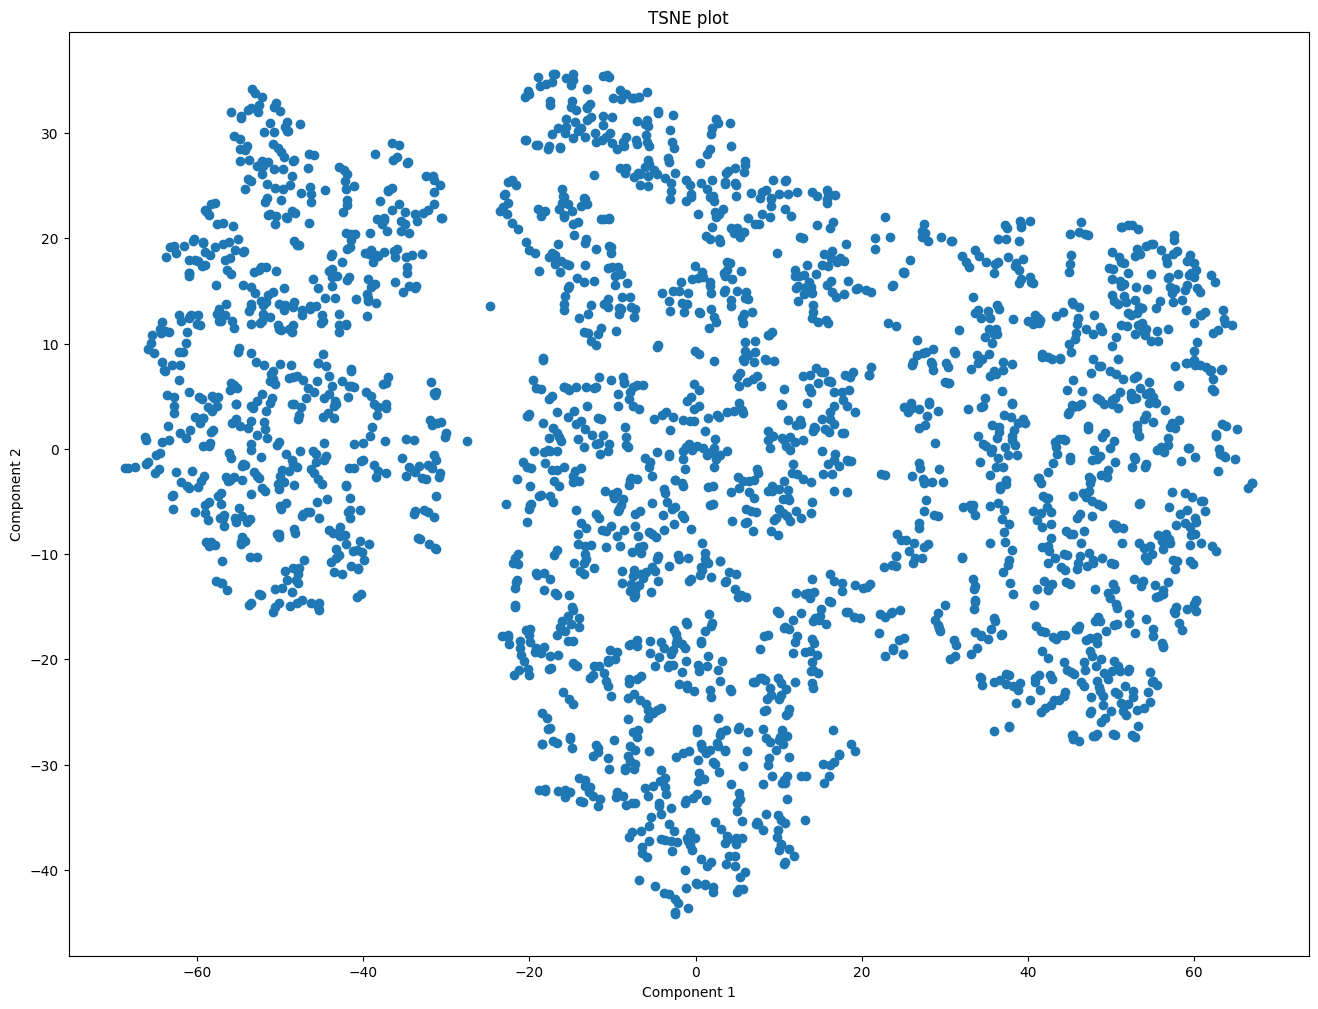

In [ ]:
plt.scatter(x_1,x_2)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("TSNE plot")
plt.show()

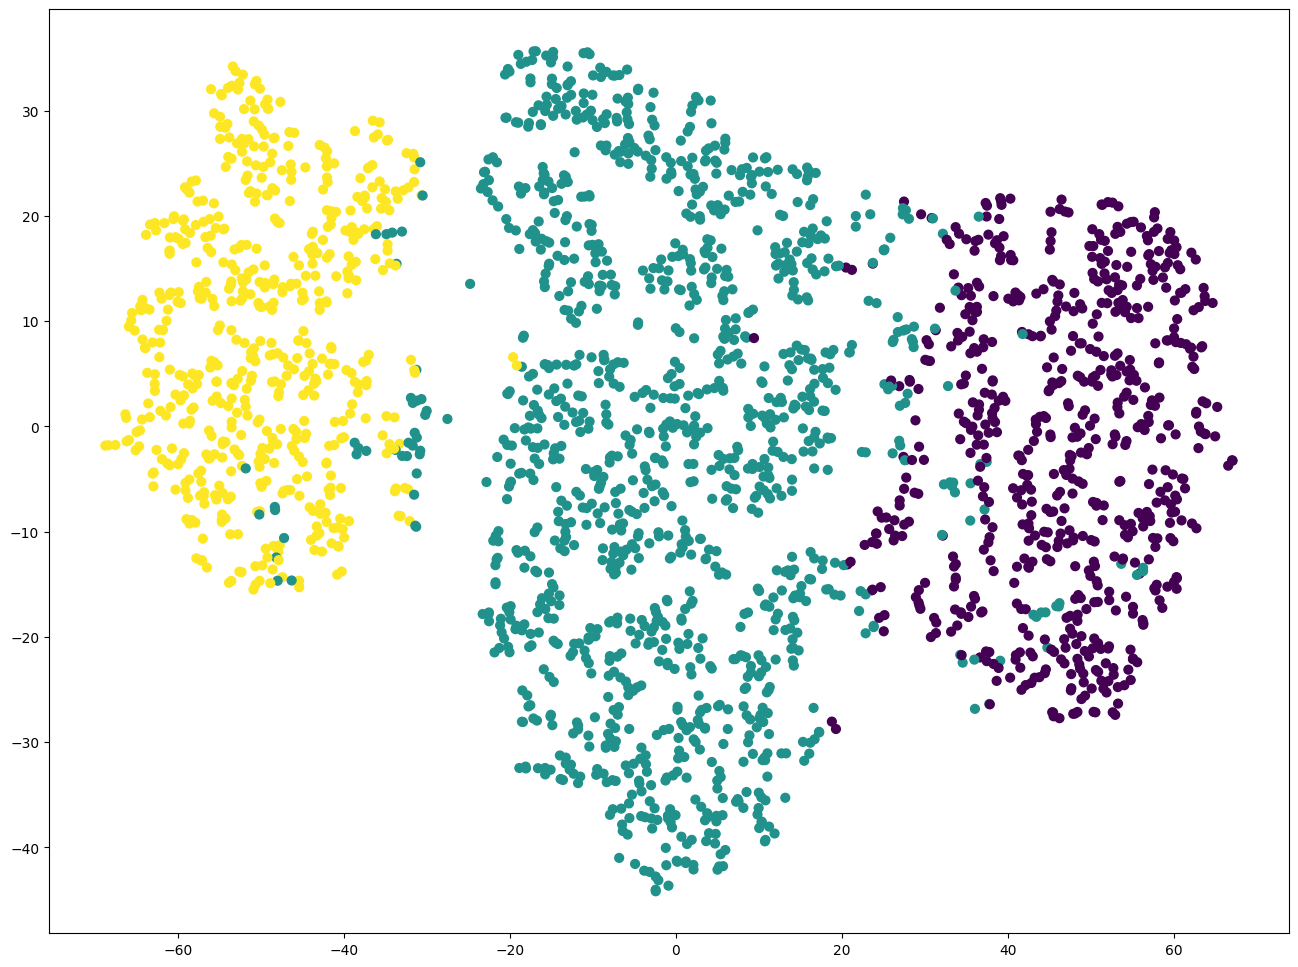

In [ ]:
plt.scatter(x_1, x_2, c=kmeans.labels_, s=40, cmap='viridis');



## Comparison between Kmeans and GMM


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/214/original/gmm42.png?1712243119' width = "600"></center>




















<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/215/original/gmm43.png?1712243185' width = "600"></center>




### Kmeans is a special case of GMM

Think about it:

- If all the variances are equal i.e
$$σ_1^2 = σ_2^2 = σ_3^2$$

and covariance,

$$ρ = 0$$

then, we'll get circular clusters just like we get in Kmeans

